# SVM

## Part I

In [11]:
#!/usr/bin/env python3
"""
Created on Wed Mar  7 23:58:01 2018

@author: Yangfan Cui
"""

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams


rcParams['figure.figsize'] = 12, 10 
#Define input array with angles from 60deg to 300deg converted to radians 
x = np.array([i*np.pi/180 for i in range(60,600,1)]) 
np.random.seed(10) #Setting seed for reproducability 
y1 = np.sin(x) + np.random.normal(0,0.15,len(x)) 
y2 = np.cos(x) + np.random.normal(0,0.15,len(x)) 
data = pd.DataFrame(np.column_stack([x,y1,y2]),columns=['x','y1','y2'])
print(data.head(5))

          x        y1        y2
0  1.047198  1.065763  0.461966
1  1.064651  0.981912  0.513628
2  1.082104  0.651138  0.553910
3  1.099557  0.889749  0.548108
4  1.117011  0.991994  0.387379


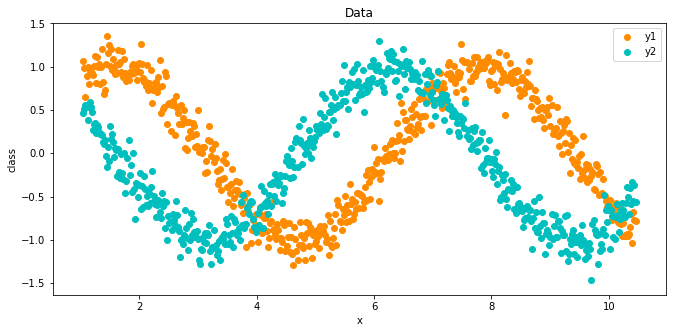

In [13]:
plt.figure(figsize=(11, 5))
plt.scatter(data['x'],data['y1'], color='darkorange', label='y1')
plt.scatter(data['x'],data['y2'], color='c',label='y2')
plt.xlabel('x')
plt.ylabel('class')
plt.title('Data')
plt.legend()
plt.show()

#### Combine the data in one data frame with two columns x and [y1,y2]. Sine function data will have class 1 and cos function data will have class 2.

In [14]:
class_1 = np.zeros(len(x))+1
class_2 = np.zeros(len(x))+2
data_1 = pd.DataFrame(np.column_stack([x,y1,class_1]),columns=['x','y','class'])
data_2 = pd.DataFrame(np.column_stack([x,y2,class_2]),columns=['x','y','class'])
data_new = data_1.append(data_2)
X = data_new[['x','y']]
y = data_new['class']
print(data_new.head())
print(data_new.tail())

          x         y  class
0  1.047198  1.065763    1.0
1  1.064651  0.981912    1.0
2  1.082104  0.651138    1.0
3  1.099557  0.889749    1.0
4  1.117011  0.991994    1.0
             x         y  class
535  10.384709 -0.588188    2.0
536  10.402162 -0.335012    2.0
537  10.419616 -0.555832    2.0
538  10.437069 -0.365890    2.0
539  10.454522 -0.561611    2.0


In [15]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
svm_rbf = SVC(kernel='rbf',C=1)
svm_rbf.fit(X, y)
svm_rbf.score(X, y) 

0.92500000000000004

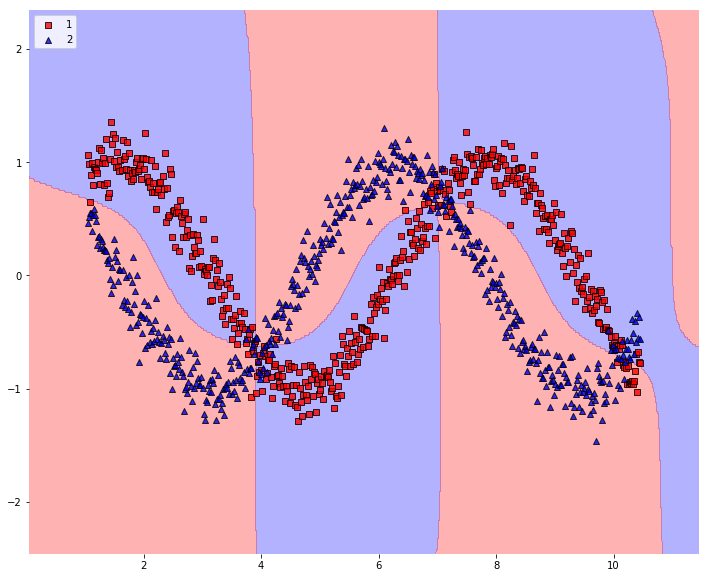

In [16]:
plot_decision_regions(np.array(X), np.array(y).astype(int), clf=svm_rbf)
plt.legend(loc='upper left')
plt.show()

By applying SVM with 'rbf' kernel, we got a quite high score on accuracy, which is also suggested from the figure that sin and cos are divided into two classes nearly perfectly.

In [17]:
# Question 3: Use SVM with sigmoid kernel
svm_sigmoid = SVC(kernel = 'sigmoid',C=1.0)
svm_sigmoid.fit(X,y)
svm_sigmoid.score(X,y)

0.50555555555555554

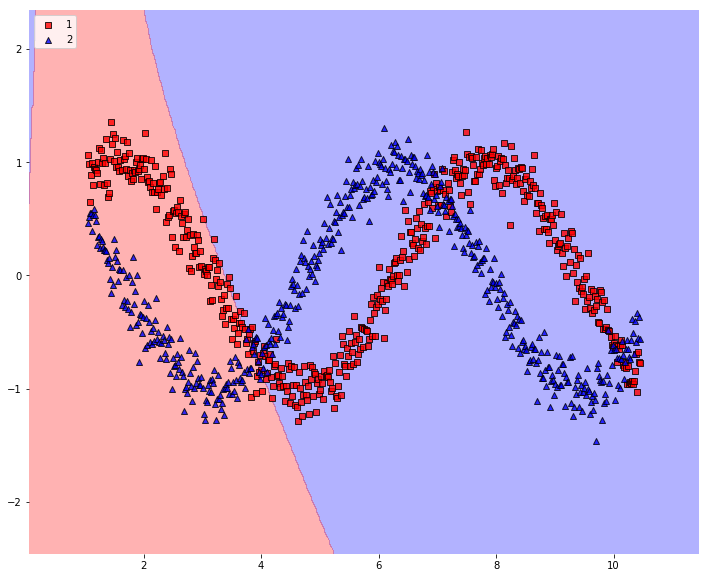

In [18]:
plot_decision_regions(np.array(X), np.array(y).astype(int), clf=svm_sigmoid)
plt.legend(loc='upper left')
plt.show()

While when I changed kernel function to sigmiod, the estimated result became bad. It seems this algorithm assign each sample randomly into a class.

In [19]:
# Question 4: Use SVM with polynomial kernel
svm_poly = SVC(kernel = 'poly', C=1.0)
svm_poly.fit(X,y)
svm_poly.score(X,y)

0.58796296296296291

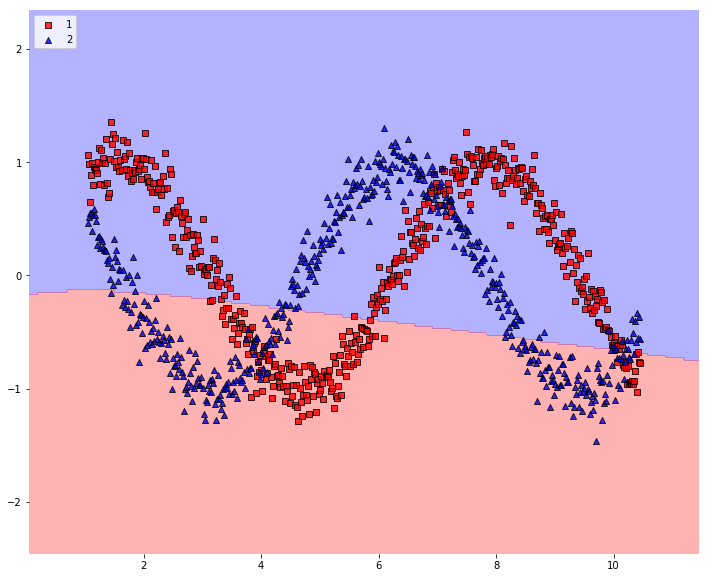

In [20]:
plot_decision_regions(np.array(X), np.array(y).astype(int), clf=svm_poly)
plt.legend(loc='upper left')
plt.show()

And polynomial kernel function does not help much, it still has a low accuracy in estimation.

In [21]:
#Question 6: Use SVM with polynomial kernel with a different degree
svm_poly2 = SVC(kernel='poly',C=1,degree=5).fit(X,y)
svm_poly2.score(X,y)

0.57407407407407407

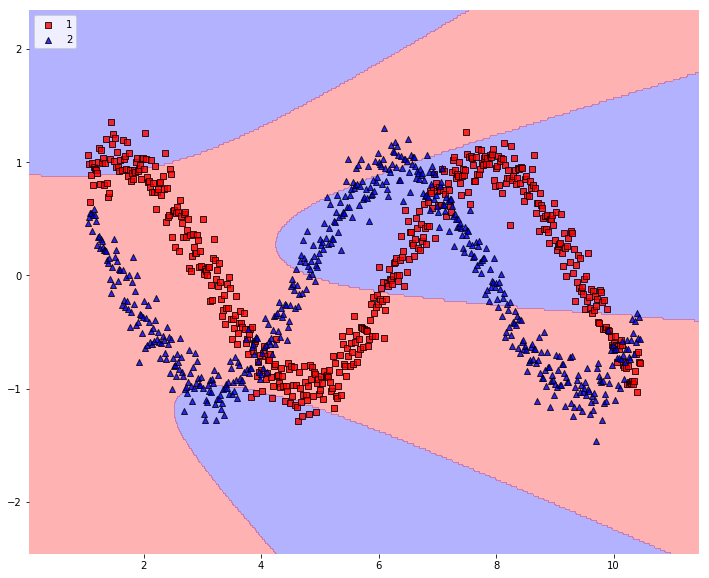

In [22]:
plot_decision_regions(np.array(X), np.array(y).astype(int), clf=svm_poly2)
plt.legend(loc='upper left')
plt.show()

We want to change the degree to try to improve the performance of SVM with kernel 'poly'. However, when the prameter degree is set to be 5, its performamce is even worse than the formor with default degree 3.

## Part II

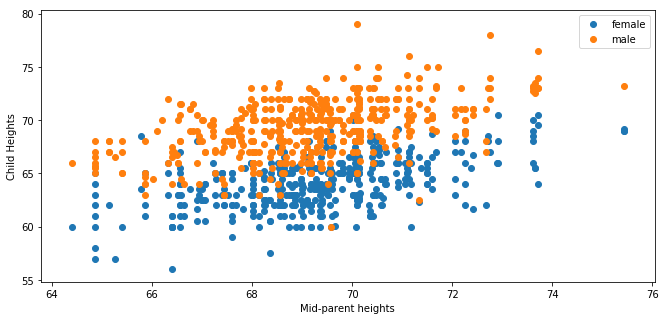

In [50]:
# Part II
heights = pd.read_csv('session7_homework.csv')
heights = heights.sample(frac=1).reset_index(drop=True)
X = heights[['midparentHeight','childHeight']]
y = heights['gender']
Female = X[y=='female']
Male = X[y=='male']
plt.figure(figsize=(11, 5))
plt.scatter(Female['midparentHeight'],Female['childHeight'],label='female')
plt.scatter(Male['midparentHeight'],Male['childHeight'],label='male')
plt.xlabel('Mid-parent heights')
plt.ylabel('Child Heights')
plt.legend()
plt.show()

In [51]:
## Logistic regression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
regre = LogisticRegression(random_state=0)
results = model_selection.cross_val_score(regre, X, y, cv=10)
print(results.mean())

0.881157509422


In [52]:
## SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state=0,C=1.0)
results = model_selection.cross_val_score(svm, X, y, cv=10)
print(results.mean())

0.88975965996


SVM only improved a little bit compared with logistic regression. Their accuracy in estimation are very similar, maybe because in this problem the decision boundary is more like a linear line, while SVM is preferred in solving nonlinear problems. In dealing with linear situations, logistic regression and SVM both work, and result close performance.

In [53]:
from sklearn.model_selection import GridSearchCV 
parameters = {'kernel':('linear', 'rbf','sigmoid'), 'C':[0.1,1,2,3,4,5,10], 'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]}
svr = SVC()
clf = GridSearchCV(svr, parameters, n_jobs=-1)
clf.fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

{'C': 0.1, 'gamma': 0.125, 'kernel': 'rbf'}
0.889721627409


Accuracy:  0.891862955032


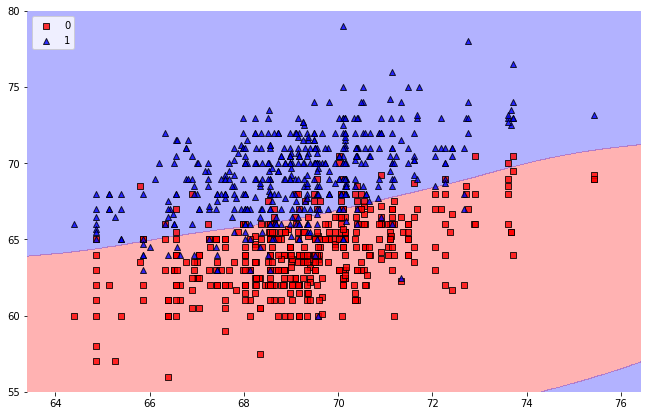

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(heights['gender'])
y = le.transform(y)

svm_gender = SVC(kernel='rbf', C=0.1, gamma=0.125)
svm_gender.fit(X, y)
print('Accuracy: ',svm_gender.score(X, y))
plt.figure(figsize=(11,7))
plot_decision_regions(np.array(X), y, clf=svm_gender)
plt.legend(loc='upper left')
plt.show()

Although GridSearch select 'rbf' kernel with C=0.1 and gamma=0.125, we can see fromt he fighre that the decision boundary is very close to a stright line.